In [17]:
import unidecode
import string
import random
import re

all_characters = string.printable
n_characters = len(all_characters)

file = unidecode.unidecode(open('Michael_Jackson_lyrics.csv').read())
file_len = len(file)
print('file_len =', file_len)

file_len = 78834


In [18]:
chunk_len = 200

def random_chunk():
    start_index = random.randint(0, file_len - chunk_len)
    end_index = start_index + chunk_len + 1
    return file[start_index:end_index]

print(random_chunk())

k baby  
A heart attack baby  
I need your body  
  
A hot kiss honey  
He's just a bitch baby  
You make me sick baby  
So unrelying  
  
I'm such a swine baby  
All down the line daddy  
I hate your 


In [19]:
import torch
import torch.nn as nn
from torch.autograd import Variable

class RNN(nn.Module):
    def __init__(self, input_size, hidden_size, output_size, n_layers=1):
        super(RNN, self).__init__()
        self.input_size = input_size
        self.hidden_size = hidden_size
        self.output_size = output_size
        self.n_layers = n_layers
        
        self.encoder = nn.Embedding(input_size, hidden_size)
        self.gru = nn.GRU(hidden_size, hidden_size, n_layers)
        self.decoder = nn.Linear(hidden_size, output_size)
    
    def forward(self, input, hidden):
        input = self.encoder(input.view(1, -1))
        output, hidden = self.gru(input.view(1, 1, -1), hidden)
        output = self.decoder(output.view(1, -1))
        return output, hidden

    def init_hidden(self):
        return Variable(torch.zeros(self.n_layers, 1, self.hidden_size))

In [20]:
# Turn string into list of longs
def char_tensor(string):
    tensor = torch.zeros(len(string)).long()
    for c in range(len(string)):
        tensor[c] = all_characters.index(string[c])
    return Variable(tensor)

print(char_tensor('abcD'))

Variable containing:
 10
 11
 12
 39
[torch.LongTensor of size 4]



In [21]:
def random_training_set():    
    chunk = random_chunk()
    inp = char_tensor(chunk[:-1])
    target = char_tensor(chunk[1:])
    return inp, target

## Evaluating

In [22]:
def evaluate(prime_str='A', predict_len=200, temperature=0.8):
    hidden = decoder.init_hidden()
    #making it a trigram model
    prime_input = char_tensor(prime_str)
    predicted = prime_str

    # Use priming string to "build up" hidden state
    for p in range(len(prime_str) - 1):
        _, hidden = decoder(prime_input[p], hidden)
    inp = prime_input[-1]
    
    for p in range(predict_len):
        output, hidden = decoder(inp, hidden)
        
        # Sample from the network as a multinomial distribution
        output_dist = output.data.view(-1).div(temperature).exp()
        top_i = torch.multinomial(output_dist, 1)[0]
        
        # Add predicted character to string and use as next input
        predicted_char = all_characters[top_i]
        predicted += predicted_char
        inp = char_tensor(predicted_char)

    return predicted

In [23]:
import time, math

def time_since(since):
    s = time.time() - since
    m = math.floor(s / 60)
    s -= m * 60
    return '%dm %ds' % (m, s)

In [24]:
def train(inp, target):
    hidden = decoder.init_hidden()
    decoder.zero_grad()
    loss = 0

    for c in range(chunk_len):
        output, hidden = decoder(inp[c], hidden)
        loss += criterion(output, target[c])

    loss.backward()
    decoder_optimizer.step()

    return loss.data[0] / chunk_len

In [25]:
n_epochs = 2000
print_every = 100
plot_every = 10
hidden_size = 100
n_layers = 1
lr = 0.005

decoder = RNN(n_characters, hidden_size, n_characters, n_layers)
decoder_optimizer = torch.optim.Adam(decoder.parameters(), lr=lr)
criterion = nn.CrossEntropyLoss()

start = time.time()
all_losses = []
loss_avg = 0

for epoch in range(1, n_epochs + 1):
    loss = train(*random_training_set())       
    loss_avg += loss

    if epoch % print_every == 0:
        print('[%s (%d %d%%) %.4f]' % (time_since(start), epoch, epoch / n_epochs * 100, loss))
        print(evaluate('Wh', 100), '\n')

    if epoch % plot_every == 0:
        all_losses.append(loss_avg / plot_every)
        loss_avg = 0

 22s (100 5%) 1.8211]
Wher,,"m?y Je ver sat wakre thay 
Minow ker mer me so  
Your so backabe Lome thare  
Yo the m  
Sacke  

 42s (200 10%) 1.7522]
Whon't nighttit'm sato me oknecis  
  
  
Tho mondenf on,  
I,  
Sancaen you son't ol for)  
Ten in mi 

 1s (300 15%) 1.7946]
Whe'n Honce  
And It leattart  
Hogind love  
I he's got a sourd I go to you more wone love  
Tordan   

 21s (400 20%) 1.7554]
Whe of let tere theod you  
And severere this be the dowing  
Be Michaon the ky me antere fabe, you ca 

 41s (500 25%) 1.5298]
Whisel purs that love  
Get say make cahe more croon don't chat, me love  
Hong)  
Hound Black  
  
Fa 

 1s (600 30%) 1.5084]
Wherlay, I son't you  
Whure ait you stream)  
Hed in  
Is goost an mine  
(Whase dring thom a non't m 

 22s (700 35%) 0.9413]
What Call yeah  
When your do me  
Betterly you thendersee Gready line  
((In't lift you  
The dyedy   

 46s (800 40%) 1.3410]
What more word the traugh  
Fallin' a shack an I can't the thath make plack  
We rip

## Plotting the training lessons

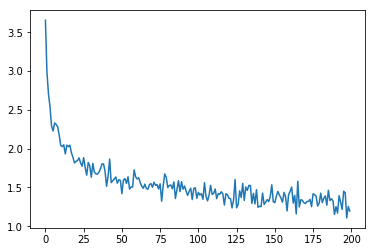

In [26]:
import matplotlib.pyplot as plt
import matplotlib.ticker as ticker
%matplotlib inline

plt.figure()
plt.plot(all_losses)

## Evaluating at different "temperatures"

In [27]:
print(evaluate('A', 300, temperature=0.8))

Ad  
Rock I down, out done  
Go never soul bow you give  
Ease one more chance  
Don't you who wit and flile  
Like want too down  
  
Baby!  
At I wand life in ir in the down in the prach  
One more chance at love  
  
Call the plack  
Calling on the Nite Line  
Don't onk a man  
Cigh and down)  
  


In [28]:
print(evaluate('Michael Jackson,', 300, temperature=0.4))

Michael Jackson,Me can down  
Good with you stop  
Like is down  
And I don't get you girl  
And you do whing you happy  
And the be is the wors  
And I don't down  
You game on down in my life a ters while you  
  
Don't get it all the Nite Line  
And I g'on down  
  
And down  
So gain in the baby, love  
So down


In [29]:
print(evaluate('M', 300, temperature=0.6))

Morck me wait blers not me is girl  
Any whing a me all  
And down  
Come on  
You girl  
I want to firal  
  
(To the Nite Line)  
Now you son't you bet to the wall  
Oh thing the down  
Ease on world to so  
  
I want that like a money  
And the place  
And to the do go do  
Caught you good  
  
So


In [30]:
import math
import numpy as np
from collections import *
from random import random

def train_char_lm(fname, order=2, add_k=1):
    ''' Trains a language model.

    This code was borrowed from http://nbviewer.jupyter.org/gist/yoavg/d76121dfde2618422139

    Inputs:
    fname: Path to a text corpus.
    order: The length of the n-grams.
    add_k: k value for add-k smoothing. NOT YET IMPLMENTED

    Returns:
    A dictionary mapping from n-grams of length n to a list of tuples.
    Each tuple consists of a possible net character and its probability.
    '''

    # TODO: Add your implementation of add-k smoothing.
    #   data = open(fname).read() 
    try: # yezheng -- tackle with "ISO-8859-1"
        data = open(fname).read() 
    except:
        data = open(fname, encoding="ISO-8859-1").read()  # "UTF-8"
    lm = defaultdict(Counter)
    pad = "~" * order # yezheng: this is just setting beginning of a line -- just like <s><s> mentioned in chapter 4
    data = pad + data
    for i in range(len(data)-order):
        history, char = data[i:i+order], data[i+order]
        lm[history][char]+=1
    
    def normalize(counter): # input is a dictionary
        s = float(sum(counter.values()) ) + add_k *len(counter)
        return [(c,(cnt+add_k)/s) for c,cnt in counter.items()]
    
    outlm = {hist:normalize(chars) for hist, chars in lm.items()}
    return outlm

def perplexity(text, lm, order=2):

    if len(list(lm.keys())[0]) != order:
        print(f"order given ({order}) is inconsistent with lm model's order ({len(list(lm.keys())[0])})")
        return -1.0 # normally, return value should not be negative
    

    pad = "~" * order
    test = pad + text
    # TODO: YOUR CODE HERE
    # Daphne: make sure (num of characters > order)
    
    logPP = 0

    for i in range(len(test)-order):
        history, char = test[i:(i+order)], test[i+order]

        if history not in lm: 
            #print('A')
            logPP -= np.log2(1.0/len(lm)) # float("-inf") # yezheng: deal with unknowns
            
        else:
            dict_temp = dict(lm[history])
            
            if char not in dict_temp:
                #print('B',char)
                #print(dict_temp)
                logPP -= np.log2(1.0/len(lm)) #float("-inf")  # yezheng: deal with unknowns
                
            else:
                logPP -= np.log2(dict_temp[char])
                

    logPP = logPP/len(text)
    PP = np.power(2,logPP)

    return PP # yezheng: should I return it? notice the SPECIFICATION above does not have "Outputs"

def perplexity2(text, lm, order=2):
    hidden = decoder.init_hidden()

    if len(list(lm.keys())[0]) != order:
        print(f"order given ({order}) is inconsistent with lm model's order ({len(list(lm.keys())[0])})")
        return -1.0 # normally, return value should not be negative
    

    pad = "~" * order
    test = pad + text
    # TODO: YOUR CODE HERE
    # Daphne: make sure (num of characters > order)
    
    logPP = 0
    
    m = nn.Softmax()

    for i in range(len(test)-order):
        history, char = test[i:(i+order)], test[i+order]

        if history not in lm: 
            #print('A')
            logPP -= np.log2(1.0/len(lm)) # float("-inf") # yezheng: deal with unknowns
            
        else:
            dict_temp = dict(lm[history])
            
            if char not in dict_temp:
                #print('B',char)
                #print(dict_temp)
                logPP -= np.log2(1.0/len(lm)) #float("-inf")  # yezheng: deal with unknowns
                
            else:
                prime_input = char_tensor(char)
                
                output, hidden = decoder(prime_input, hidden)
                
                distribution = m(output)
                #output_dist = output.data.view(-1).div(temperature).exp()
                
                #print('all_characters',all_characters)
                #print('position',all_characters.find(char))
                position = all_characters.find(char)
                probability = distribution.data[0][position]
                #print('probability', probability)
                
                logPP -= np.log2(probability)
                

    logPP = logPP/len(lm)
    PP = np.power(2,logPP)

    return PP # yezheng: should I return it? notice the SPECIFICATION above does not have "Outputs"

In [35]:
model_filename = 'Michael_Jackson_lyrics.csv'
lm = train_char_lm(model_filename)


t1 = "Oh oh oh oh"
t2 = "Billie Jean"
t3 = "beat it"
t4 = " I "
t5 = "my girl"
t6 = "I wanna saw fight"
t7 = "Ad baby, baby"
t8 = "where men are free"
t9 = "shake that thing girl"


perp1 = perplexity2(t1, lm, order=2)
perp2 = perplexity2(t2, lm, order=2)
perp3 = perplexity2(t3, lm, order=2)
perp4 = perplexity2(t4, lm, order=2)
perp5 = perplexity2(t5, lm, order=2)
perp6 = perplexity2(t6, lm, order=2)
perp7 = perplexity2(t7, lm, order=2)
perp8 = perplexity2(t8, lm, order=2)
perp9 = perplexity2(t9, lm, order=2)

print('perplexity', t1, perp1)
print('perplexity', t2, perp2)
print('perplexity', t3, perp3)
print('perplexity', t4, perp4)
print('perplexity', t5, perp5)
print('perplexity', t6, perp6)
print('perplexity', t7, perp7)
print('perplexity', t8, perp9)
print('perplexity', t9, perp9)


perplexity Oh oh oh oh 1.0636218250089897
perplexity Billie Jean 1.0688443934994143
perplexity beat it 1.043708398442604
perplexity  I  1.0145643253055008
perplexity my girl 1.0381465963413763
perplexity I wanna saw fight 1.1148724820027458
perplexity Ad baby, baby 1.0827279023747887
perplexity where men are free 1.1446096521925033
perplexity shake that thing girl 1.1446096521925033


/home1/a/arranz/miniconda3/lib/python3.6/site-packages/ipykernel_launcher.py:116: UserWarning: Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.


In [32]:
model_filename = 'Michael_Jackson_lyrics.csv'
lm = train_char_lm(model_filename)

t1 = "Oh oh oh oh"
t2 = "Billie Jean"


perp1 = perplexity2(t1, lm, order=2)
perp2 = perplexity2(t2, lm, order=2)


print('perplexity', t1, perp1)
print('perplexity', t2, perp2)

perplexity Oh oh oh oh 1.06362182551538
perplexity Billie Jean 1.0688443931934166


/home1/a/arranz/miniconda3/lib/python3.6/site-packages/ipykernel_launcher.py:116: UserWarning: Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.
